In [ ]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Sampling- (as well as sample-) space for a single fair-coin toss
S = c('H', 'T')

# Corresponding probabilities
p = c(0.5, 0.5)

# Samples representing outcomes of the experiment of selecting 1 object from
# the sampling space with replacement - this corresponds to genrating outcomes
# of the random experiment of tossing a single fair coin
#set.seed(1)
samplesize = 1e04
simulatedData = sample(S, size = samplesize, replace = TRUE, prob = p)

# Create dataframe comprising frequency of each possible outcome in the sample space
df= as.data.frame(table(simulatedData))
colnames(df) = c('Toss', 'Frequency')
#print(df)

# Frequency plot
p = ggplot(data = df, aes(x = Toss, y = Frequency)) +
  geom_bar(stat = 'identity', fill="steelblue") +
  geom_text(aes(label = Frequency), vjust = -0.3, size = 6)+
  theme_minimal()

p

In [ ]:
# Sampling- (as well as sample-) space for rolling a single fair die
S = c(1:6)

# Corresponding probabilities
p = (1/6)*c(1, 1, 1, 1, 1, 1)

# Samples representing outcomes of the experiment of selecting 1 object from
# the sampling space with replacement - this corresponds to generating outcomes
# of the random experiment of rolling a single fair die
#set.seed(1)
samplesize = 1e04
simulatedData = sample(S, size = samplesize, replace = TRUE, prob = p)

# Create dataframe comprising frequency of each possible outcome in the sample space
df = as.data.frame(table(simulatedData))
colnames(df) = c('Roll', 'Frequency')
#print(df)

# Frequency plot
p = ggplot(data = df, aes(x = Roll, y = Frequency)) +
  geom_bar(stat = 'identity', fill="steelblue") +
  geom_text(aes(label = Frequency), vjust = -0.3, size = 6)+
  theme_minimal()

p

In [ ]:
# Sampling- (as well as sample-) space for rolling a single fair die
S = c(1:6)

# Corresponding probabilities
p = (1/6)*c(1, 1, 1, 1, 1, 1)

# Samples representing outcomes of the experiment of selecting 2 objects from
# the sampling space with replacement - this corresponds to generating outcomes
# of the random experiment of rolling two fair dice
samplesize = 1e04
simulatedData = replicate(samplesize, sample(S, size = 2, replace = TRUE, prob = p))
#print(simulatedData)

# Fraction of outcomes where the sum of the rolls is equal to 7
print(sum(simulatedData[1, ] + simulatedData[2, ] == 7) / samplesize)

In [ ]:
# Sampling space for ice-cream selection
S = c('vanilla', 'pista', 'strwaberry', 'chocolate', 'blackberry',
 'blueberry', 'mango', 'sitaphal', 'chickoo', 'jack fruit')

# Corresponding probabilities
n = length(S)
p = (1/n)*replicate(n, 1)

# Samples representing outcomes of the experiment of selecting 3 objects from
# the sampling space with replacement - this corresponds to generating outcomes
# of the random experiment of selecting 3 flavors from the 10 available
#set.seed(1)
samplesize = 1e04
simulatedData = replicate(samplesize, sample(S, size = 3, replace = TRUE, prob = p))

# Approximate probability of getting 3 distinct flavors
print(sum(lengths(apply(simulatedData, 2, unique)) == 3) / samplesize)

In [ ]:
(choose(6,3)*choose(6,2)*choose(4,2)*choose(2,2))/(6^6)
(choose(6,1)*5^2*choose(6,4))/(6^6)
(choose(5,4)*choose(4,1)+choose(5,5))/(5^5)

In [ ]:
S = c(1,2,3,4,5) # 5 workers

# Corresponding probabilities
n = length(S)
p = (1/n)*replicate(n, 1)

samplesize = 1e6
simulatedData = replicate(samplesize, sample(S, size = 5, replace = TRUE, prob = p))
# print(simulatedData)

checkEvent = function(data){
    unique_number = unique(data)                # collecting all the unique values occured
    for (val in unique_number){
        if (length(which(data==val))>=4){       # checking if any unique value occured 4 times or greater
            return (1)
        }
    }
    return (0)
}

approximate_probability = sum(apply(simulatedData, 2, checkEvent)) / samplesize
cat("Approximate probability of worker breaking the machine at least 4 times is ", approximate_probability, '\n')


In [ ]:
# Sampling space for rolling a single fair die
S = c(1:6)

# Corresponding probabilities
p = (1/6)*c(1, 1, 1, 1, 1, 1)

# Samples representing outcomes of the experiment of selecting 6 objects from
# the sampling space with replacement - this corresponds to generating outcomes
# of the random experiment of rolling a fair die 6 times
samplesize = 1e06
simulatedData = replicate(samplesize, sample(S, size = 6, replace = TRUE, prob = p))

checkEvent = function(data){
    unique_numbers = unique(data) # collecting all the unique values occured
    for (val in unique_numbers){
      if (sum(val == data) != 2){
        return(0)
      }
    }    
    return (1)
}

approximate_probability = sum(apply(simulatedData, 2, checkEvent)) / samplesize
cat("Approximate probability of 3 numbers appearing twice each is ", approximate_probability, '\n')

In [ ]:
# Sampling space for rolling a single fair die
S = c(1:6)

# Corresponding probabilities
p = (1/length(S))*replicate(length(S), 1)

# Samples representing outcomes of the experiment of selecting 1 object from
# the sampling space - this corresponds to generating outcome of the random
# experiment of rolling a fair die once
samplesize = 1e05
simulatedData = replicate(samplesize, sample(S, size = 1, prob = p))

checkEvent = function(data){
  # Check if roll is greater than or equal to 3 and even (E AND F)
  if ((data >= 3) && ((data %% 2) == 0)){    
    return(1)
  }
  else{
    return(0)
  }
}

approximate_probability = sum(apply(as.matrix(simulatedData), 1, checkEvent)) / samplesize
cat("Approximate probability of getting a number >=3 and even is ", approximate_probability, '\n')

In [ ]:
# Sampling space for rolling a single fair die when it is known that the rolls are even
S = c(2, 4, 6)

# Corresponding probabilities
p = (1/length(S))*replicate(length(S), 1)

# Samples representing outcomes of the experiment of selecting 1 object from
# the sampling space - this corresponds to generating outcome of the random
# experiment of rolling a fair die once given that the rolls are known to be even
samplesize = 1e05
simulatedData = replicate(samplesize, sample(S, size = 1, prob = p))

checkEvent = function(data){
  # Check if roll is greater than or equal to 3
  if (data >= 3){    
    return(1)
  }
  else{
    return(0)
  }
}

approximate_probability = sum(apply(as.matrix(simulatedData), 1, checkEvent)) / samplesize
cat("Approximate probability of getting a number >=3 given that the rolls are even is ", approximate_probability, '\n')

Below are relevant functions in R for a binomial RV $X\sim\text{Bin}(n,p)$:

* dbinom(j, size=n, prob=p): compute $\text{P}(X=j)$;
* pbinom(j, size=n, prob=p): compute $\text{P}(X<=j)$;
* pbinom(j, size=n, prob=p, lower.tail = False): compute $\text{P}(X>=j)$;
* qbinom(q, size=n, prob=p): find the smallest j satisfying $\text{P}(X\leq j)=q$;
* rbinom(samplesize, size=n, prob=p): generate $samplesize$ independent random values of $X$.

Binomial random variable with parameters n = 12 (no. of trials) and p = 0.2 (success probability). We want to calculate P(X=4)
$$X\sim\text{Bin}(n=12, p =0.2)$$

In [ ]:
n = 12
p = 0.2
j = 4 # number os successes is random
dbinom(j, n, p) # P(X=4)

[1] 0.1328756

In [ ]:
# What about P(X<=4)?
n = 12
p = 0.2
j = 4
pbinom(j, n, p)
dbinom(0, n, p)+dbinom(1, n, p)+dbinom(2, n, p)+dbinom(3, n, p)+dbinom(4, n, p)

[1] 0.9274445

[1] 0.9274445

In [ ]:
# What about P(3<=X<=5)?
dbinom(3, n, p)+dbinom(4, n, p)+dbinom(5, n, p)
pbinom(5, n, p)-pbinom(2, n, p) # [P(X=0) + P(X=1)+ P(X=2)+ P(X=3) + P(X=4) + P(X=5)]-[P(X=0) + P(X=1)+ P(X=2)]

[1] 0.422249

[1] 0.422249

Simulate a binomial random variable $X\sim\text{Bin}(n=12, p =0.2)$ and calculate $P(X=4).$

Each simulation results in a certain number of success in $n$ trials with success probability equal to $p$ in each trial.

In [ ]:
samplesize = 1e06
n = 12
p = 0.2
simulatedData = rbinom(samplesize, n, p)
sum(simulatedData == 4) / samplesize # Monte Carlo approximation for P(X=4)

[1] 0.133351

Simulate 10000 samples of binomial random variable with parameters n = 12, p = 0.2

,Output
,<int>
1,1
2,5
3,2
4,4
5,3


[1] 68828

[1] 0.068828

[1] 0.06871948

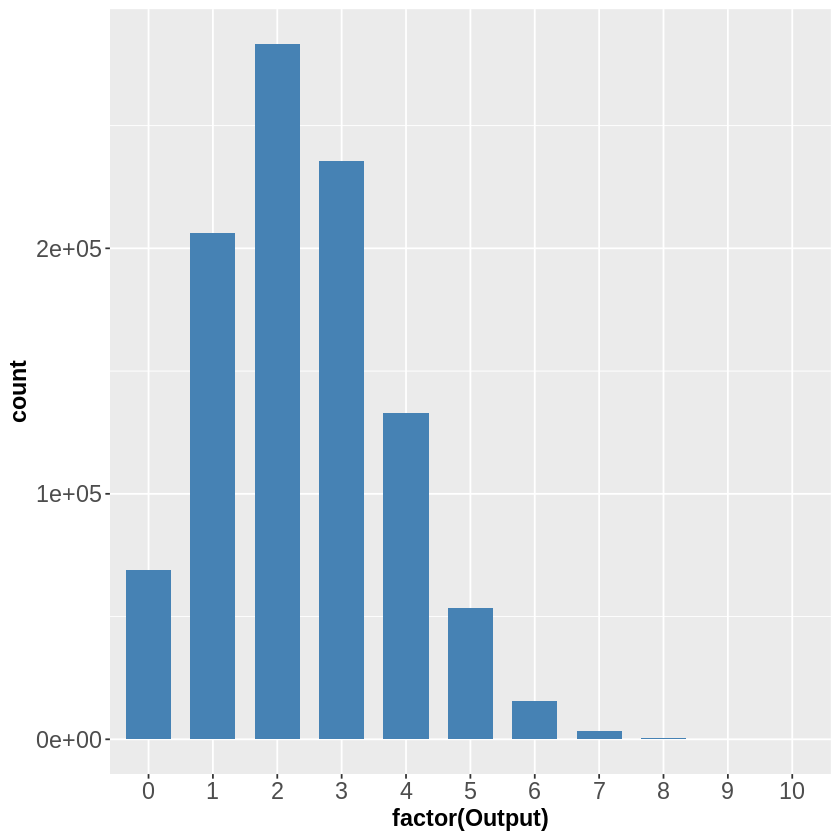

In [ ]:
n = 12
p = 0.2
samplesize = 1e06
simulatedData = rbinom(samplesize, n, p)
dfBinom = as.data.frame(simulatedData)
colnames(dfBinom) = c('Output')
head(dfBinom, 5)
p1 = ggplot(data = dfBinom, aes(x = factor(Output))) +
  geom_bar(stat = 'count', width = 0.7, fill = 'steelblue')+
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title =element_text(size = 14, face = "bold"))
p1  
sum(simulatedData==0)
mean(simulatedData==0)
dbinom(0, n, p)

Plot the Probability Mass Function (PMF) of a binomial random variable with parameters n=12 and p=0.2.

$$X\sim\text{Bin}(n=12, p =0.2).$$

$$\underbrace{P_X}_\text{function name}\left(\underbrace{j}_{\text{input}}\right) = \underbrace{P(X=j)}_\text{output}.$$


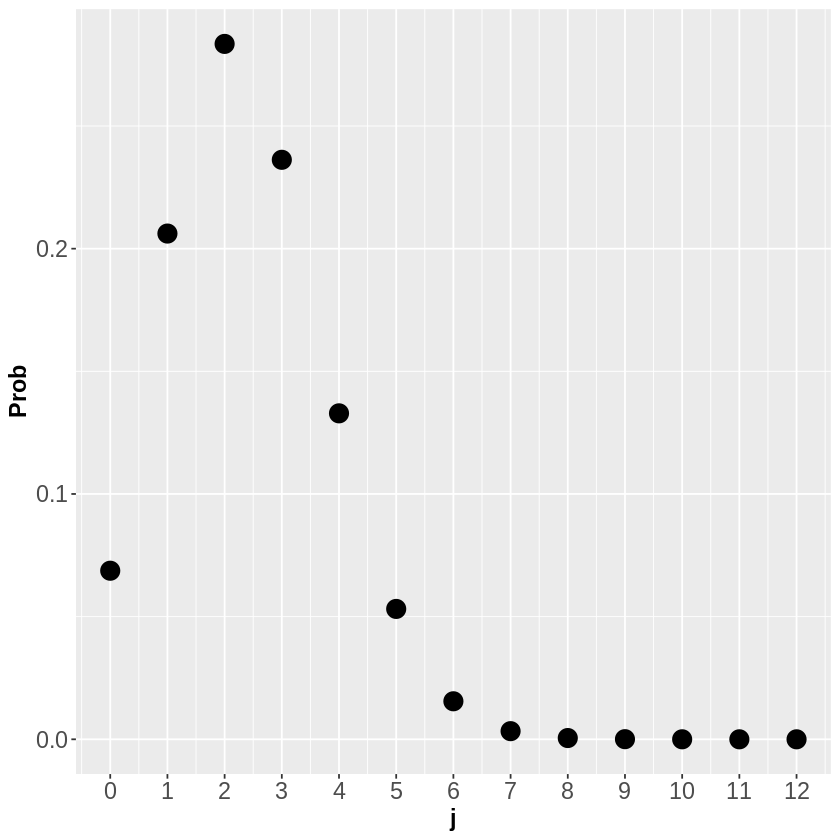

In [ ]:
n = 12
p = 0.2
j = c(0:n)
dfBinom = as.data.frame(cbind(j, dbinom(j, n, p)))
colnames(dfBinom) = c('j', 'Prob')
p1 = ggplot(data = dfBinom, aes(x = j, y = Prob)) +
  geom_point(size = 5) +
  scale_x_continuous(breaks = seq(0, n, by = 1)) +
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title = element_text(size = 14, face = "bold"))
p1

Plot the Cumulative Distribution Function (CDF) of a binomial random variable with parameters n=12 and p=0.2.

$$X\sim\text{Bin}(n=12, p =0.2).$$

$$\underbrace{F_X}_\text{function name}\left(\underbrace{j}_{\text{input}}\right) = \underbrace{P(X\leq j)}_\text{output}.$$


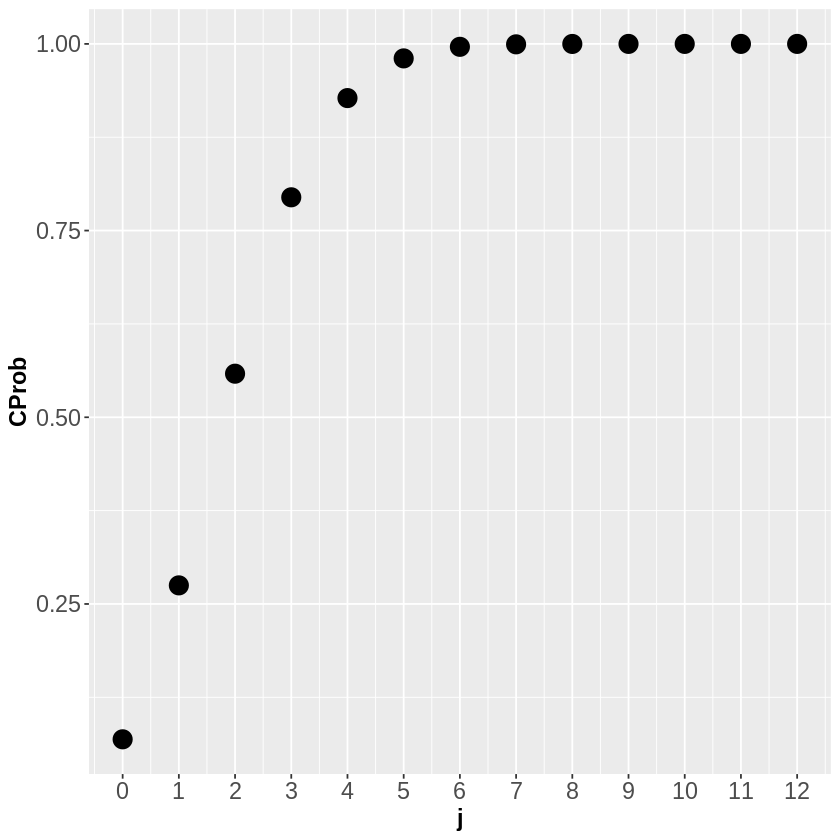

In [ ]:
# Plot the Cumuluative Distribution Function (CDF) of a
# binomial random variable with parameters n=12 and p=0.2
# assign the probabilities
n = 12
p = 0.2
j = 0:n
df = as.data.frame(cbind(j, pbinom(j, n, p)))
colnames(df) = c('j', 'CProb')
p1 = ggplot(data = df, aes(x = j, y = CProb)) +
  geom_point(size = 5) +
  scale_x_continuous(breaks = seq(0, n, by = 1)) +
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title =element_text(size = 14, face = "bold"))
p1

Simulate 10000 samples of binomial random variable with parameters n = 1, p = 0.2:
$$X\sim\text{Bin}(n=1, p=0.2)\Rightarrow X\sim\text{Bernoulli}(p=0.2).$$
$X$ counts the number of successes in 1 trial.

,Output
,<int>
1,1
2,0
3,0
4,0
5,0


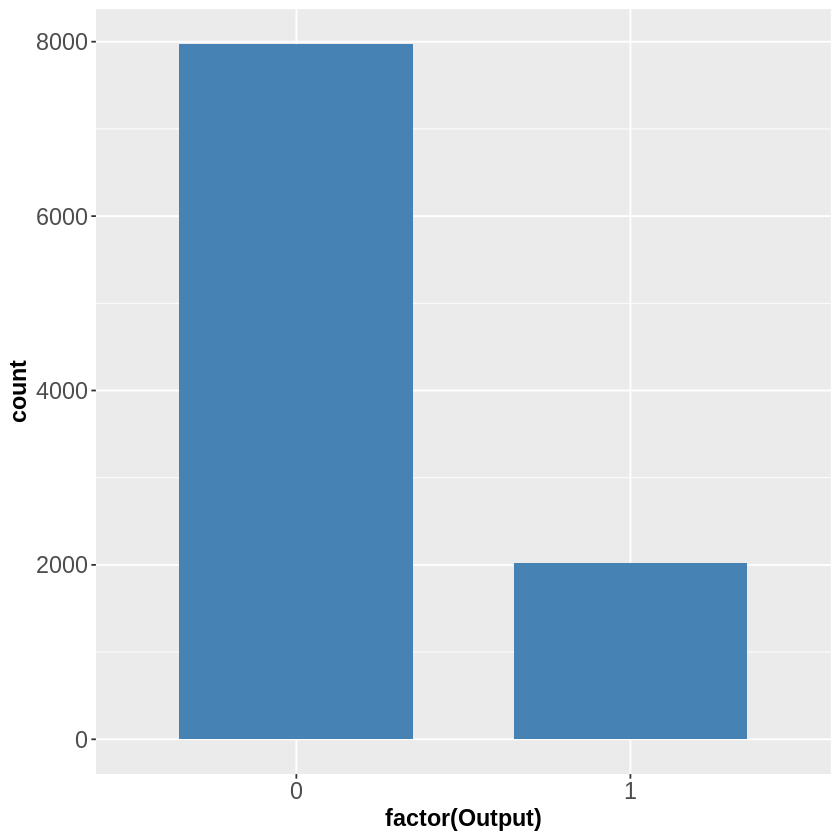

In [ ]:
n = 1
p = 0.2
samplesize = 10000
simulatedData = rbinom(samplesize, n, p)
dfBernoulli = as.data.frame(simulatedData)
colnames(dfBernoulli) = c('Output')
head(dfBernoulli, 5)
p1 = ggplot(data = dfBernoulli, aes(x = factor(Output))) +
  geom_bar(stat = 'count', width = 0.7, fill = 'steelblue')+
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title =element_text(size = 14, face = "bold"))
p1  

Expected value of a Binomial random variable $X~\sim\text{Bin}(n = 12, p = 0.2)$ using simulation

In [ ]:
n = 12
p = 0.2
samplesize = 1e6
simulatedData = rbinom(samplesize, n, p)
#simulatedData
mean(simulatedData)

[1] 2.398159

Expected value of a Binomial random variable $X~\sim\text{Bin}(n = 12, p = 0.8)$ using simulation

In [ ]:
n = 12
p = 0.8
samplesize = 1e6
simulatedData = rbinom(samplesize, n, p)
#simulatedData
mean(simulatedData)

[1] 9.600689

Expected value of a Binomial random variable $X~\sim\text{Bin}(n = 12, p = 0.2)$ using theoretical probabilities is:

$\begin{align*}E[X] &= \sum_x x\times P_X(x)\end{align*}.$

Note that the lower case $x$ is a dummy index variable which can be replaced with say $j$:

$\begin{align*}E[X] &= \sum_j j\times P_X(j)\\&= 0\times P(X=0)+1\times P(X=1)+\cdots+12\times P(X=12)\\&\approx 0\times\frac{n_0}{\text{nsamples}}+1\times\frac{n_1}{\text{nsamples}} +\cdots+12\times\frac{n_{12}}{\text{nsamples}}\\&=\text{sum of simulated values of }X/\text{nsamples}.\end{align*}.$

In [ ]:
n = 12
p = 0.2
j = c(0:n)
sum(j * dbinom(j, n, p))

[1] 2.4

Variance of a Binomial random variable $X~\sim\text{Bin}(n = 12, p = 0.2)$ using simulation

In [ ]:
n = 12
p = 0.2
samplesize = 1e01
simulatedData = rbinom(samplesize, n, p)
print(simulatedData)
simulatedMean = mean(simulatedData)
print(simulatedMean)
simulatedDeviation = simulatedData -  simulatedMean
print(simulatedDeviation)
simulatedSqDeviation = simulatedDeviation^2
print(simulatedSqDeviation)
meanSimulatedSqDeviation = mean(simulatedSqDeviation)
print(meanSimulatedSqDeviation) # Variance of the random variable
print(mean((simulatedData - mean(simulatedData))^2)) # Variance of the random variable
print(sqrt(mean((simulatedData - mean(simulatedData))^2))) # Standard deviation of the random variable

 [1] 2 1 2 2 1 1 5 1 4 2
[1] 2.1
 [1] -0.1 -1.1 -0.1 -0.1 -1.1 -1.1  2.9 -1.1  1.9 -0.1
 [1] 0.01 1.21 0.01 0.01 1.21 1.21 8.41 1.21 3.61 0.01
[1] 1.69
[1] 1.69
[1] 1.3


Variance of a Binomial random variable $X~\sim\text{Bin}(n = 12, p = 0.2)$ using theoretical probabilities is:

$\begin{align*}\text{Var}[X] &= E[(X-E[X])^2]\\&=
\sum_x (x-E[X])^2\times P_X(x).\end{align*}$

In [ ]:
n = 12
p = 0.2
j = c(0:n)
meanBinom = sum(j * dbinom(j, n, p)) # expected value
varBinom = sum((j - meanBinom)^2 * dbinom(j, n, p))
print(meanBinom)
print(n*p)
print(varBinom)
print(n*p*(1-p))

[1] 2.4
[1] 2.4
[1] 1.92
[1] 1.92


A person conducting telephone surveys must get 4 more completed surveys before their job is finished. On each randomly dialed number, there is a 90% chance of the participant rejecting the call. What is the probability that the person will finish their job at the 10th call?

A deck of cards contains 20 cards: 6 red cards and 14 black cards. 5 cards are drawn randomly *without replacement*. What is the probability that exactly 4 red cards are drawn?

$$X\sim\text{HypGeom}(n_s = 6, n_f = 14, n = 5)$$

$$P(X=4) = \frac{n_sC_4\times n_fC_{5-4}}{(n_s+n_f)C_5}$$

In [ ]:
n = 5
ns = 6
nf = 14
dhyper(4, ns, nf, n)

[1] 0.01354489

A deck of cards contains 20 cards: 6 red cards and 14 black cards. 5 cards are drawn randomly *with replacement*. What is the probability that exactly 4 red cards are drawn?

$$X\sim\text{Bin}(n = 5, p = 6/20)$$

In [ ]:
n = 5
ns = 6
nf = 14
p = ns/(ns+nf)
dbinom(4, n, p)

[1] 0.02835

A small voting district has 1010 female voters and 950 male voters. A random sample of 10 voters is drawn. What is the probability exactly 5 of the voters will be female?

$$X\sim\text{HypGeom}(n_s=1010, n_f = 950, n = 10)$$

In [ ]:
dhyper(500, 1010, 950, 1000) # P(X=5)
dbinom(500, 1000, 1010/(950+1010)) # P(X=5)

[1] 0.01385106

[1] 0.01578503

There are 40,000 gates on an integrated circuit (IC) chip. If the probability of a gate being defective is 1/100,000, independently of all other gates, what is the probability that exactly 10 gates are defective?

In [ ]:
n = 40000
p = 1/100000 # (ns=1, nf = 100000-1) or (ns = 2, nf = 2(100000-1))
dbinom(10, n, p)
dhyper(10, 1, 100000-1, 40000)

[1] 1.934965e-11

[1] 0

Suppose that a batch of 100 items contains 6 that are defective and 94 that are not defective. If a random sample of 10 items is drawn from the batch, what is the probability of finding more than 2 defective items?

A purchaser of transistors buys them in lots of 20. It is his policy to randomly inspect 4 components from a lot and to accept the lot only if all 4 are non-defective. If each component in a lot is, independently, defective with probability 0.1, what proportion of lots is rejected?

It is known that diskettes produced by a certain company will be defective with probability .01, independently of each other. The company sells the diskettes in packages of size 10 and offers a money-back guarantee that at most 1 of the 10 diskettes in the package will be defective. The guarantee is that the customer can return the entire package of diskettes if he or she finds more than one defective diskette in it. If someone buys 3 packages, what is the probability that he or she will return exactly 1 of them?

In a forest that has 100 tigers, 20 are captured, tagged and released. A few weeks later, a sample of 10 tigers from the forest is captured. What is the probability that at least 5 of those captured tigers are tagged?

At an airport, it is know that approximately 2 out of 10 passengers have a metallic object. If left undetected at the manual security check at the airport entrance,  such a metallic object will raise an alarm when the passenger walks through an automated screening machine. It is considered a security breach when the alarm gets raised 20 times a day. What is the probability of a security breach on a particular day when the 100th passenger walks through the automated screening machine?

$$X\sim\text{NegBin}(r = 20, p = 2/10)$$

$$P(X = 100)$$

In [ ]:
r = 20
p = 2/10
dnbinom(10-r, r, p)

[1] 0.01986004

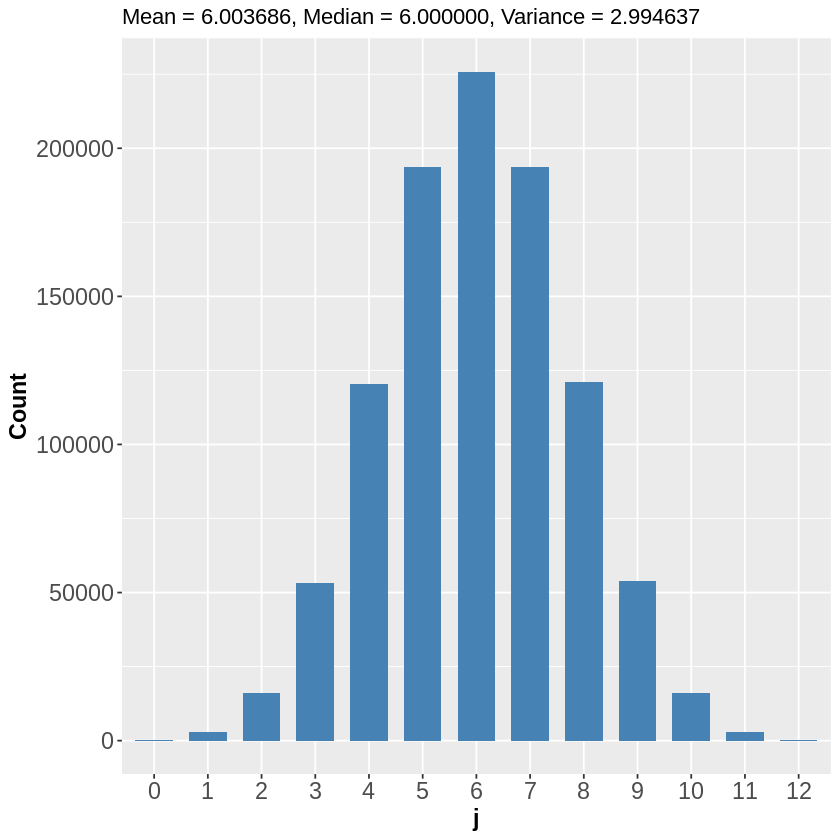

In [ ]:
n = 12
p = 0.5
samplesize = 1e06
simulatedData = rbinom(samplesize, n, p)
dfBinom = as.data.frame(simulatedData)
colnames(dfBinom) = c('Output')
p1 = ggplot(data = dfBinom, aes(x = factor(Output))) +
  geom_bar(stat = 'count', width = 0.7, fill = 'steelblue')+
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title =element_text(size = 14, face = "bold")) +
  labs(x = 'j',
       y = 'Count',
       title = sprintf('Mean = %f, Median = %f, Variance = %f', mean(simulatedData), median(simulatedData), var(simulatedData)))
p1 

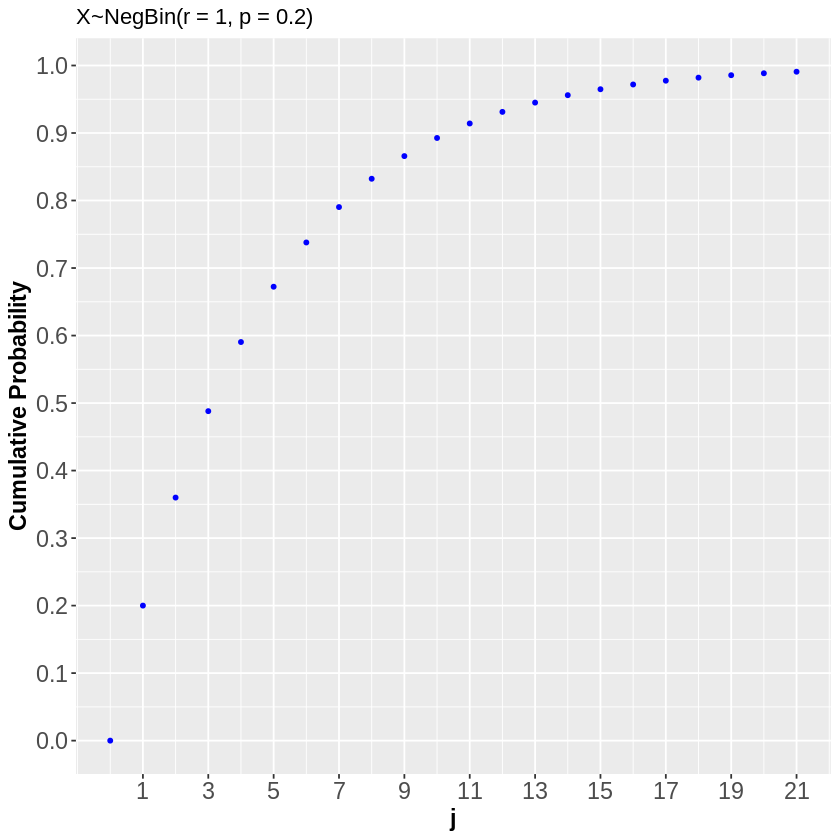

In [ ]:
# Plot the Cumuluative Distribution Function (CDF) of a
# negative binomial random variable with parameters r=1 and p=0.2
r = 1
p = 0.2
j = c(0:(r+20))
df = as.data.frame(cbind(j, pnbinom(j-r, r, p)))
colnames(df) = c('j', 'CProb')
p1 = ggplot(data = df, aes(x = j, y = CProb)) +
  geom_point(size = 1, color = 'blue') +
  scale_x_continuous(breaks = seq(r, r+20, by = 2)) +
  scale_y_continuous(breaks = seq(0, 1, by = 0.1)) +
  theme(axis.text = element_text(size = 14),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title =element_text(size = 14, face = "bold"))+
  labs(x = 'j', y = 'Cumulative Probability', title = 'X~NegBin(r = 1, p = 0.2)')
p1

Simulate 10000 samples of a Poisson random variable with parameter $\lambda = 3$.

$$X\sim\text{Poi}(\lambda = 3).$$

,Output
,<int>
1,2
2,3
3,3
4,7
5,3


[1] 3.001465

[1] 3

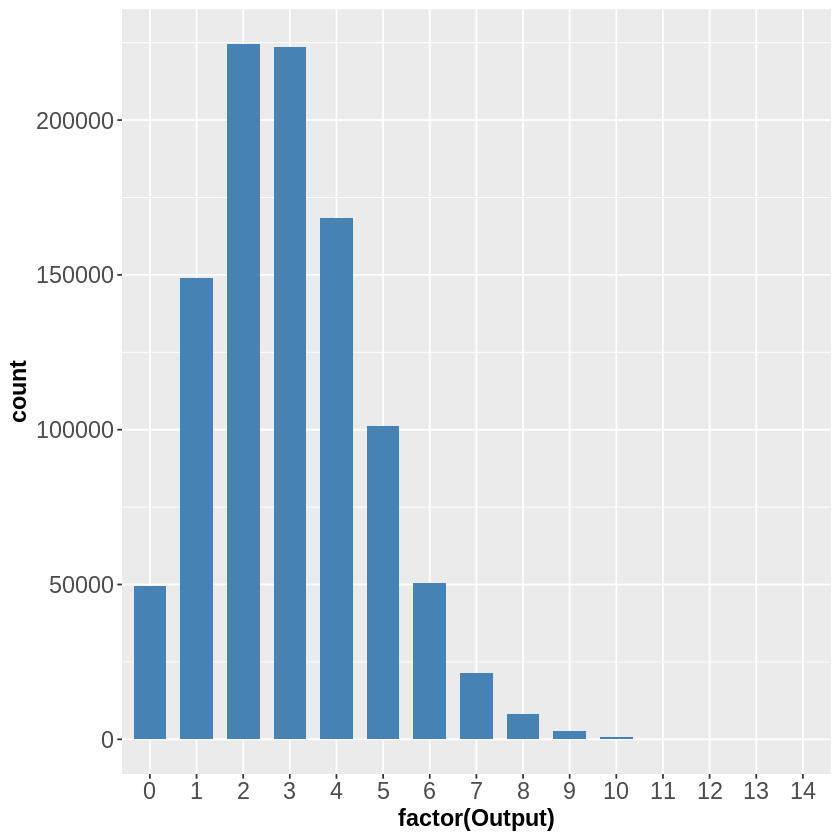

In [ ]:
lambda = 3
samplesize = 1e06
simulatedData = rpois(samplesize, lambda)
df = as.data.frame(simulatedData)
colnames(df) = c('Output')
head(df, 5)
p1 = ggplot(data = df, aes(x = factor(Output))) +
  geom_bar(stat = 'count', width = 0.7, fill = 'steelblue')+
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title =element_text(size = 14, face = "bold"))
p1  
mean(simulatedData)
median(simulatedData)

Plot the Probability Mass Function (PMF) of a Poisson random variable with parameter $\lambda = 3.$

$$X\sim\text{Pois}(\lambda = 3).$$

$$\underbrace{P_X}_\text{function name}\left(\underbrace{j}_{\text{input}}\right) = \underbrace{P(X=j)}_\text{output}.$$


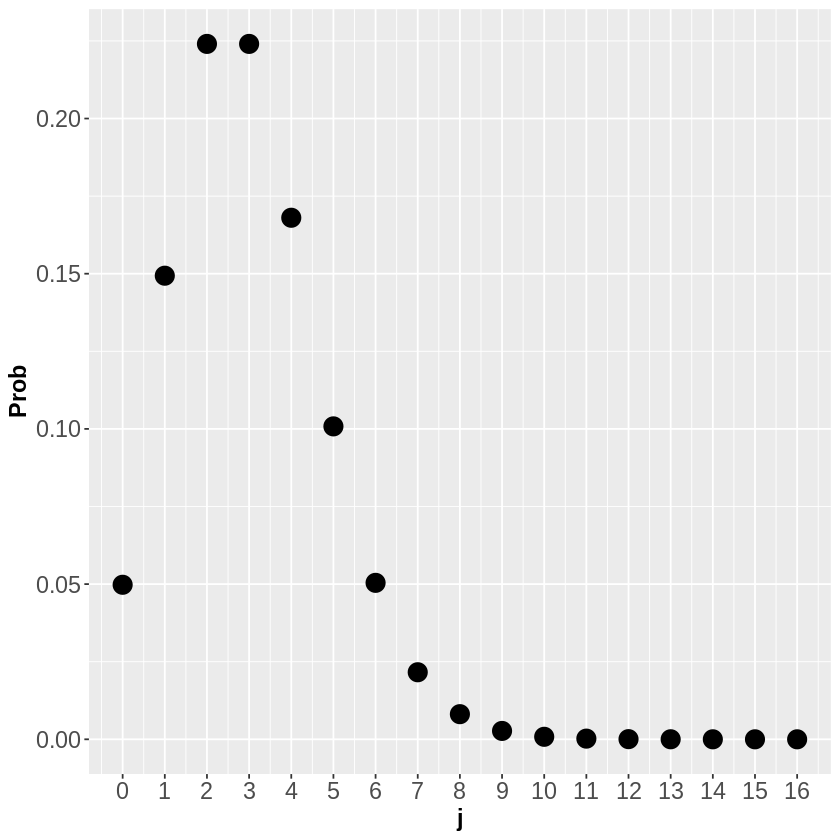

In [ ]:
lambda = 3
n = 16
j = c(0:n)
df = as.data.frame(cbind(j, dpois(j, lambda)))
colnames(df) = c('j', 'Prob')
p1 = ggplot(data = df, aes(x = j, y = Prob)) +
  geom_point(size = 5) +
  scale_x_continuous(breaks = seq(0, n, by = 1)) +
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title = element_text(size = 14, face = "bold"))
p1

Simulating the height (in cm) of 10000 individuals

,Output
,<dbl>
1,160.0215
2,169.6040
3,173.8550
4,170.6846
5,165.7058


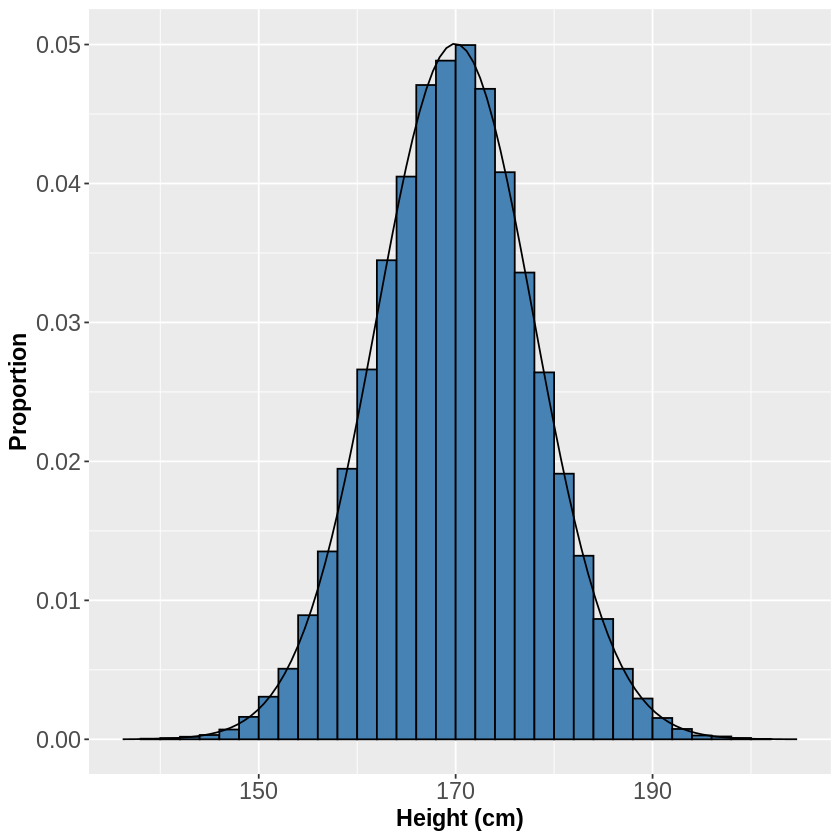

In [ ]:
mu = 170
sigma = 8
samplesize = 1e5
simulatedData = rnorm(samplesize, mean = mu, sd = sigma)
df = as.data.frame(simulatedData)
colnames(df) = c('Output')
head(df, 5)
p1 = ggplot(data = df, aes(x = Output)) +
  geom_histogram(aes(y =..density..),
  breaks = seq(mu-4*sigma, mu+4*sigma, by = 2),
  colour = "black", fill = "steelblue") +
  stat_function(fun = dnorm, args = list(mean = mean(df$Output), sd = sd(df$Output))) +
  labs(x = 'Height (cm)', y = 'Proportion') +
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title =element_text(size = 14, face = "bold"))
p1  

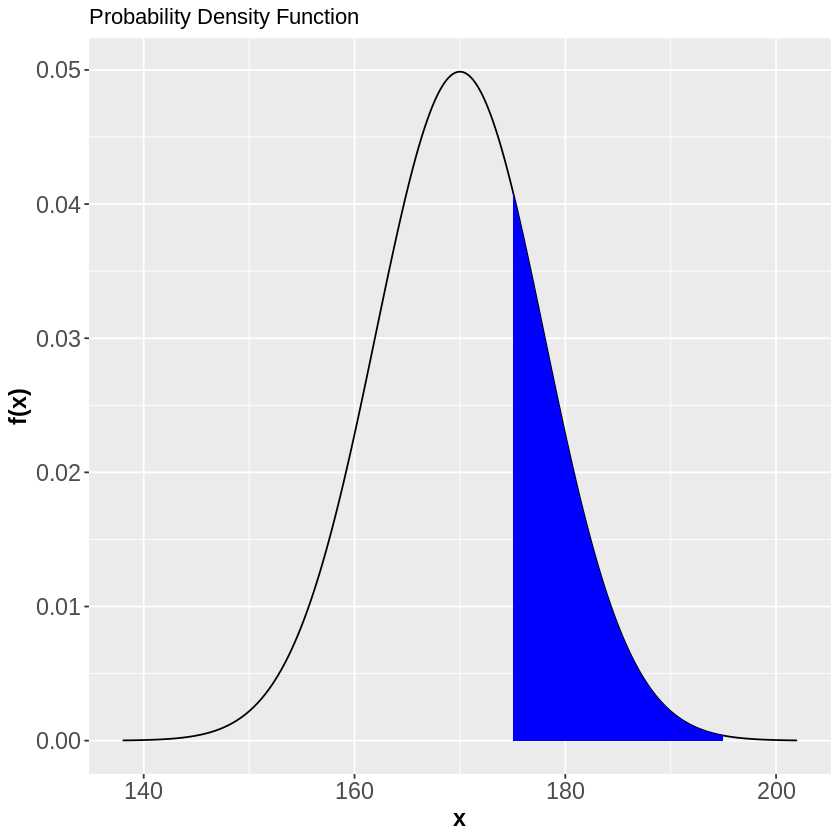

In [ ]:
mu = 170
sigma = 8
x = seq(mu-4*sigma, mu+4*sigma, by = (8*sigma)/1000)
y = dnorm(x = x, mean = mu, sd = sigma)

df = data.frame(x, y)
p = ggplot(df) +
  geom_line(aes(x, y)) +
  geom_ribbon(data = df %>% filter(x >= 175 & x <= 195),  aes(x = x,
                  ymin = 0, ymax = y), fill = "blue") +
  labs(x = 'x', y = 'f(x)', title = 'Probability Density Function') +
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title =element_text(size = 14, face = "bold"))
p  

In [ ]:
mu = 170
sigma = 8
dnorm(175, mean = mu, sd = sigma)
pnorm(195, mean = mu, sd = sigma)-pnorm(175, mean = mu, sd = sigma)

[1] 0.04102012

[1] 0.2650965